#  Olist E-commerce Data Analysis

**BY : JUDITH OKON**

![Picture](ecommerce.png)

## Problem Statement

Olist is a Brazilian e-commerce platform that connects small and medium-sized businesses to customers across Brazil. The platform operates as a marketplace, where merchants can list their products and services and customers can browse and purchase them online.

The Olist sales dataset is a collection of anonymized data about orders placed on the Olist from September 2016 to September 2018. It contains a wide range of information about each order, including the order date, product details, payment and shipping information, customer and seller IDs, and customer reviews. The dataset also includes information about the sellers who list their products on Olist, as well as data on customer behavior and demographics. The dataset is designed to help analysts and researchers better understand the e-commerce landscape in Brazil and identify opportunities for growth and optimization.

In this notebook, I will help Olist gain better insights into their e-commerce platform and optimize available opportunities for growth, by providing answers to the business questions below:

1. What is the total revenue generated by Olist, and how has it changed over time?
2. How many orders were placed on Olist, and how does this vary by month?
3. What are the most popular product categories on Olist, and how do their sales volumes compare to each other?
4. What is the average order value (AOV) on Olist, and how does this vary by product category and payment method?
5. Who are the top active sellers on olist?
6. What is the distribution of seller ratings on Olist, and how does this impact sales performance?
7. How many customers have made repeat purchases on Olist, and what percentage of total sales do they account for?
8. What is the average customer rating for products sold on Olist, and how does this impact sales performance?
9. What is the total order cancellation on Olist, and how does this impact the company's revenue?
10. Which payment methods are most commonly used by Olist customers
11. Which product categories have the highest revenue on Olist, and how can the company increase revenue across different categories?
12. What Geolocation has high customer density?

___

## Data Dictionary

 1. **olist_customers_dataset.csv**
- customer_id: unique identifier for each customer
- customer_unique_id: unique identifier for each customer (anonymized)
- customer_zip_code_prefix: zip code prefix of the customer's address 
- customer_city: city where the customer is located
- customer_state: state where the customer is located


 2. **olist_geolocation_dataset.csv**
- geolocation_zip_code_prefix: zip code prefix for the location
- geolocation_lat: latitude of the location
- geolocation_lng: longitude of the location
- geolocation_city: city of the location
- geolocation_state: state of the location


 3. **olist_orders_dataset.csv**
- order_id: unique identifier for each order
- customer_id: unique identifier for the customer who placed the order
- order_status: current status of the order (e.g. delivered, shipped, canceled) 
- order_purchase_timestamp: date and time when the order was placed
- order_approved_at: date and time when the payment for the order was approved 
- order_delivered_carrier_date: date and time when the order was handed over to the carrier
- order_delivered_customer_date: date and time when the order was delivered to the customer
- order_estimated_delivery_date: estimated date when the order is expected to be delivered


 4. **olist_order_items_dataset.csv**
- order_id: unique identifier for the order
- order_item_id: unique identifier for each item within an order
- product_id: unique identifier for the product being ordered
- seller_id: unique identifier for the seller who listed the 
- product shipping_limit_date: date and time when the seller has to ship the product 
- price: price of the product
- freight_value: shipping fee for the product


 5. **olist_order_payments_dataset.csv**
- order_id: unique identifier for the order
- payment_sequential: index number for each payment made for an order
- payment_type: type of payment used for the order (e.g. credit card, debit card, voucher) 
- payment_installments: number of installments in which the payment was made 
- payment_value: value of the payment made


 6. **olist_products_dataset.csv**
- product_id: unique identifier for each product
- product_category_name: name of the category that the product belongs to 
- product_name_lenght: number of characters in the product name
- product_description_lenght: number of characters in the product description 
- product_photos_qty: number of photos for the product
- product_weight_g: weight of the product in grams
- product_length_cm: length of the product in centimeters 
- product_height_cm: height of the product in centimeters
- product_width_cm: width of the product in centimeters


 7. **olist_sellers_dataset.csv**
- seller_id: unique identifier for each seller 
- seller_zip_code_prefix: zip code prefix for the seller's location 
- seller_city: city where the seller is located
- seller_state: state where the seller is located


 8. **product_category_name_translation.csv**
- product_category_name: name of the product category in Portuguese 
- product_category_name_english: name of the product category in English


 9. **olist_order_reviews_dataset.csv**
- review_id: unique identifier for each review
- order_id: unique identifier for the order that the review is associated with 
- review_score: numerical score (1-5) given by the customer for the product 
- review_comment_title: title of the review comment
- review_comment_message: text of the review comment
- review_creation_date: date and time when the review was created 
- review_answer_timestamp: date and time when the seller responded to the review (if applicable)

Note: The review comment fields (i.e. review_comment_title and review_comment_message) are optional, and may not be present in all reviews.


___

## Data Loading

### Import necessary libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

### Load each dataset into a dataframe

In [2]:
customer_df = pd.read_csv('olist_customers_dataset.csv')
geolocation_df =  pd.read_csv('olist_geolocation_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
orderitems_df = pd.read_csv('olist_order_items_dataset.csv')
orderpayments_df = pd.read_csv('olist_order_payments_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
productcategoryname_df = pd.read_csv('product_category_name_translation.csv')
orderreviews_df = pd.read_csv('olist_order_reviews_dataset.csv')

### <p><span style='color:purple'>1. Customer_df</span></p>

In [3]:
# View the dataframe
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### <p><span style='color:purple'>2. Geolocation_df</span></p>

In [7]:
# View the dataframe
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### <p><span style='color:purple'>3. Orders_df</span></p>

In [11]:
# View dataframe
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### <p><span style='color:purple'>4. Orderitems_df</span></p>

In [15]:
# View dataframe
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### <p><span style='color:purple'>5. Orderpayments_df</span></p>

In [19]:
# View dataframe
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### <p><span style='color:purple'>6. Products_df</span></p>

In [23]:
# View dataframe
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### <p><span style='color:purple'>7. Sellers_df</span></p>

In [28]:
# View dataframe
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### <p><span style='color:purple'>8. ProductCategoryName_df</span></p>

In [32]:
# View dataframe
productcategoryname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### <p><span style='color:purple'>9. OrderReviews_df</span></p>

In [36]:
# View dataframe
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


___

# Dataset Relationship

| Table | Primary key |  Foreign key/s |
| -------- | -------- | -------- |
| Customer_df | customer_id | zip code prefix |
| Geolocation_df | zip code prefix | - |
| Orders_df | order_id  | customer_id |
| Orderitems_df | - | order_id,product_id,seller_id |
| Orderpayments_df| - | order_id |
| Products_df | product_id | - |
| Sellers_df | seller_id | zip code prefix |
| Productcategoryname | - | product_category_name|
| orderreviews_df | - | order_id |


![Picture](Dataset-relationship.png)

___

# Data Exploration and Analysis

Let us explore and analyse the data to answer the business questions.

# 1. What is the total revenue generated by Olist, and how has it changed over time?

This is the total money generated from sales of products on the olist e-commerce platform 

> ### Clean the orders_df dataframe

In [40]:
# 1. Remove the timestamp by creating a new column showing just the date
orders_df['order_purchase_date'] = orders_df['order_purchase_timestamp'].apply(lambda x: x[0:10])

# 2. Change the new date column to datetime datatype
orders_df['order_purchase_date'] = pd.to_datetime(orders_df['order_purchase_date'])

# 3. Create a new dataframe, with only the needed columns
orders_df2 = orders_df.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                             'order_delivered_customer_date','order_estimated_delivery_date'], axis = 1)
# show the result
orders_df2.head()


,order_id,customer_id,order_status,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13


> ### Show the the orderpayment_df dataframe

In [41]:
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


> ### Join both orders_df2 and orderpayments_df dataframe

This join will be done with full outer join on SQL using the order_id column of both dataframes and the result will be imported back into this notebook

![Picture](olist_sql1.png)

> ### Import the joined dataset

In [42]:
orders_and_orderpayments_merged_df = pd.read_csv('ordersdf2andorderpayments.csv')
orders_and_orderpayments_merged_df.head()

,column1,order_id,customer_id,order_status,order_purchase_date,order_id.1,payment_sequential,payment_type,payment_installments,payment_value
0,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,949d5b44dbf5de918fe9c16f97b45f8a,1.0,credit_card,1.0,72.20
1,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,ad21c59c0840e6cb83a9ceb5573f8159,1.0,credit_card,1.0,28.62
2,5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,a4591c265e18cb1dcee52889e2d8acc3,1.0,credit_card,6.0,175.26
3,6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,136cce7faa42fdb2cefd53fdc79a6098,1.0,credit_card,1.0,65.95
4,7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16,6514b8ad8028c9f2cc2374ded245783f,1.0,credit_card,3.0,75.16


> ### Clean the joined dataframe

In [43]:
# 1. Drop unnecessary columns
orders_and_orderpayments_merged_df.drop(['column1', 'order_id.1'], axis =1, inplace = True)

# 2. Drop null row. There is one row where the order_status says delivered, yet there are no 
# values under payment informations
orders_and_orderpayments_merged_df.dropna(axis = 0, inplace = True)

# 3. Change the order_purchase_date to datetime
orders_and_orderpayments_merged_df['order_purchase_date'] = pd.to_datetime(orders_and_orderpayments_merged_df['order_purchase_date'])


> ### Drop rows with cancelled and unavailable order status

The rows with order status showing canceled and unavailable will be dropped because it means the order was not finalized and the company did not generate any revenue from those orders.

In [44]:
# Drop canceled and unavailable order_status rows

orders_and_orderpayments_merged_df.drop(orders_and_orderpayments_merged_df[orders_and_orderpayments_merged_df['order_status'] == 'canceled'].index, axis=0, inplace = True)

orders_and_orderpayments_merged_df.drop(orders_and_orderpayments_merged_df[orders_and_orderpayments_merged_df['order_status'] == 'unavailable'].index, axis=0, inplace = True)



##  <p><span style='color:purple'>Answering the business question</span></p>

## a) Find the total revenue

In [45]:
Total_Revenue = orders_and_orderpayments_merged_df['payment_value'].sum()
Total_Revenue_Millions = round(Total_Revenue/1000000,2)

print('The total revenue generated by Olist is R${}M'.format(Total_Revenue_Millions))

The total revenue generated by Olist is R$15.74M


## b) Find the trend of revenue overtime

In [46]:
# Create a quartely time period for the payment value

#1. create a new dataframe with only the order purchase date and payment value columns 
revenue_trend = orders_and_orderpayments_merged_df.loc[:,['order_purchase_date', 'payment_value']]

#2. set the order_purchase_date as the index of the dataframe
revenue_trend = revenue_trend.set_index('order_purchase_date')

#3. Group the order_puchase_date by quarter and find the sum of payment value for each quarter
quarter_total_revenue = revenue_trend.resample('Q', closed='right').agg({'payment_value': 'sum'})

# Show result
quarter_total_revenue

,payment_value
order_purchase_date,
2016-09-30,136.23
2016-12-31,51677.15
2017-03-31,846285.10
2017-06-30,1488742.01
2017-09-30,1958125.57
2017-12-31,2799338.97
2018-03-31,3235342.38
2018-06-30,3322546.83
2018-09-30,2036942.77


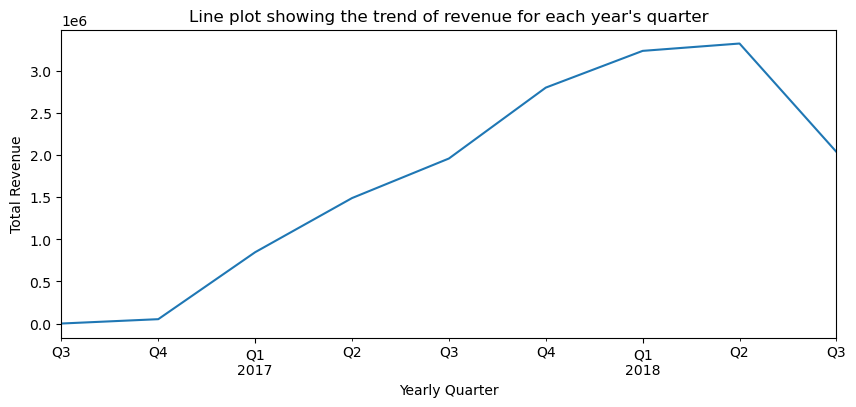

In [47]:
# Create a line plot to show the trend of revenue overtime

fig,ax = plt.subplots(figsize = (10,4))

quarter_total_revenue.plot(ax = ax, legend = False)

plt.xlabel('Yearly Quarter')
plt.ylabel('Total Revenue')
plt.title("Line plot showing the trend of revenue for each year's quarter")
plt.show()


This chart shows the total payment value for orders made on a quarterly basis and is grouped by order_purchase_date, which is the date when the orders were made.

According to the chart, the highest total payment value was recorded in the second quarter of 2018 (i.e., the period between April and June 2018), with a total payment value of 3,322,546.83. This was closely followed by the total payment value recorded in the first quarter of 2018 (i.e., the period between January and March 2018), with a total payment value of 3,235,342.38. 
The lowest total payment value was recorded in the third quarter of 2016 (i.e., the period between July and September 2018), with a total payment value of 136.23. Overall, it appears that the total payment value increased from September 2016 to June 2018, before decreasing in the following quarters.

The chart provides insight into the amount of revenue generated by orders made on a quarterly basis, which can be useful for identifying trends and patterns in the company's sales performance over time.

# 2. How many orders were placed on Olist, and how does this vary by month?

Using the orders_df2 dataframe 

In [48]:
# Drop rows with order status that shows canceled and unavailable

orders_df2 = orders_df2.drop(orders_df2[orders_df2['order_status'] == 'canceled'].index, axis=0)

orders_df2  = orders_df2.drop(orders_df2[orders_df2['order_status'] == 'unavailable'].index, axis=0)


In [49]:
orders_df2.head()

,order_id,customer_id,order_status,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13


##  <p><span style='color:purple'>Answering the business question</span></p>

## a) The total number of orders placed on Olist

In [50]:
num_of_orders = len(orders_df2['order_id'].unique())

print('The total number of orders placed on Olist is {}'.format(num_of_orders))

The total number of orders placed on Olist is 98207


## b) Find the trend of orders placed monthly

In [51]:
# Create a monthly time period for orders placed

#1. create a new dataframe with only the order_id columns and order purchase date
orders_placed_trend = orders_df2.loc[:,['order_id', 'order_purchase_date']]

#2. set the order_purchase_date as the index of the dataframe
orders_placed_trend = orders_placed_trend.set_index('order_purchase_date')

#3. Rename the column of the dataframe
orders_placed_trend = orders_placed_trend.rename(columns = {'order_id' : 'order_id_count'})

#4. Group the order_puchase_date by quarter and find the count of each quarter
monthly_order_placed = orders_placed_trend.resample('M').agg({'order_id_count': 'count'})

# Show result
monthly_order_placed

,order_id_count
order_purchase_date,
2016-09-30,2
2016-10-31,293
2016-11-30,0
2016-12-31,1
2017-01-31,787
2017-02-28,1718
2017-03-31,2617
2017-04-30,2377
2017-05-31,3640


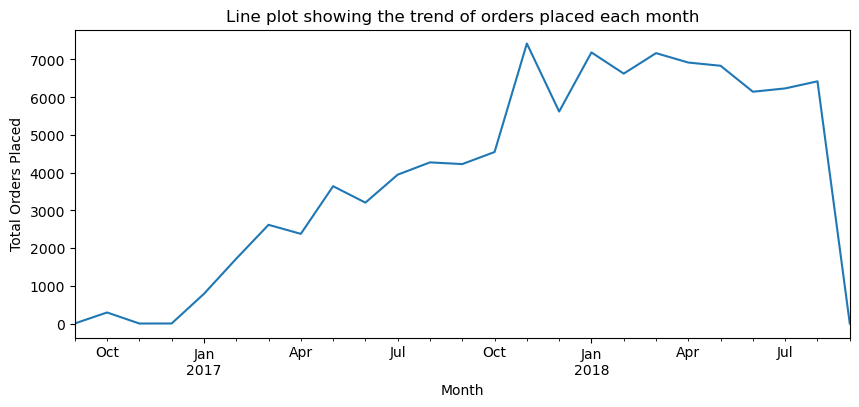

In [52]:
# Create a line plot to show the trend of orders placed monthly

fig,ax = plt.subplots(figsize = (10,4))

monthly_order_placed.plot(ax = ax, legend = False)

plt.xlabel('Month')
plt.ylabel('Total Orders Placed')
plt.title("Line plot showing the trend of orders placed each month")
plt.show()

The chart represents the count of number of orders made each month from September 2016 to September 2018. The data shows a fluctuating trend with an initial count of 2 orders in September 2016 and a peak of 7423 orders in November 2017. The number of orders then decreases in December 2017 and rises again to 7187 in January 2018, followed by a gradual decrease until September 2018, where the number of order reaches one.

This information can be used to help identify trends and make informed business decisions, such as planning inventory and staffing levels for peak months.


# 3. What are the most popular product categories on Olist, and how do their sales volumes compare to each other?

To answer this question, 3 dataframes were joined, namely products_df, ProductCategoryName_df and orderitems_df

This join was achieved using Inner join on SQL, and will be imported into this notebook

![Picture](product_productcategory_orderitems.png)

> ### Import the joined dataset

In [53]:
# Import the joined dataset
product_productcategory_orderitems_df = pd.read_csv('product_productcategory_orderitems.csv')

# Show the result
product_productcategory_orderitems_df.head()

,product_id,product_category_name,product_category_name.1,product_category_name_english,column1,order_id,order_item_id,product_id.1,seller_id,shipping_limit_date,price,freight_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff,cool_stuff,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop,pet_shop,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,moveis_decoracao,furniture_decor,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
3,7634da152a4610f1595efa32f14722fc,perfumaria,perfumaria,perfumery,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18.000,12.99,12.79
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,ferramentas_jardim,garden_tools,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14


> ### Group the column needed for this analysis and show its value count

In [54]:
# Group the product_category_name_english by its categories and find the count of each category
grouped_product_category = product_productcategory_orderitems_df.groupby('product_category_name_english')['product_category_name_english'].count().sort_values(ascending = False)

# Convert it to a Dataframe
grouped_product_category = pd.DataFrame(grouped_product_category)

# Rename the count column
grouped_product_category = grouped_product_category.rename(columns = {'product_category_name_english':'product_count'})

# Show the result
grouped_product_category

,product_count
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14


##  <p><span style='color:purple'>Answering the business question</span></p>

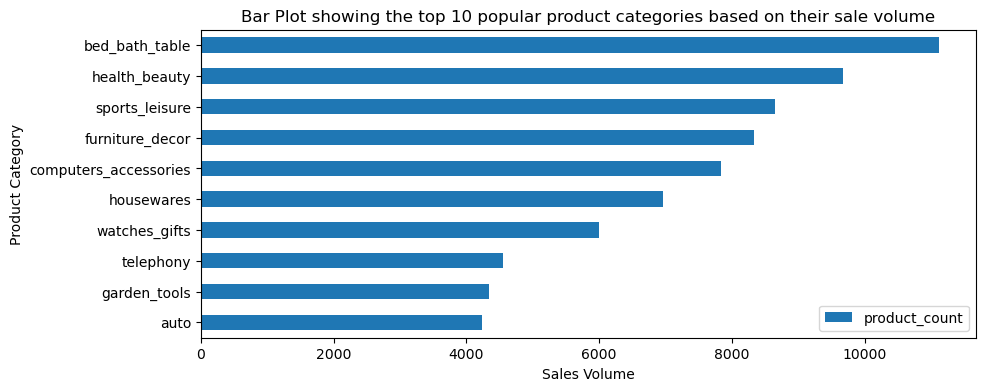

In [55]:
# Draw the bar plot for the above table

# Select top 10 categories
top10_product_category = grouped_product_category.head(10)

# Set the axis
fig,ax = plt.subplots(figsize = (10,4))

# plot the barplot using plt and have the values in the x axis
top10_product_category.sort_values(by = 'product_count').plot(ax = ax, kind = 'barh')

# Plot the bar chart using seaorn
#sns.barplot(x = top10_product_category['product_count'] , y= top10_product_category.index )

plt.xlabel('Sales Volume')
plt.ylabel('Product Category')
plt.title("Bar Plot showing the top 10 popular product categories based on their sale volume")
plt.show()

Bed Bath Table, Health Beauty, Sport Leisure, Furniture Decor, Computer Accessories, Housewares, Watches Gifts, Telephone, Garden Tools and Auto are the most popular product categories based on their sale volume.

However, Bed Bath Table accounts for the product with the highest sales volume, with 11,115 products sold between January 2017 and August 2018

# 4. What is the average order value (AOV) on Olist, and how does this vary by product category and payment method?

## a) What is the average order value (AOV) on Olist?

In [56]:
# This is gotten from the result of the first business question. We take the total revenue and divide by its length
average_order_value = orders_and_orderpayments_merged_df['payment_value'].mean()
average_order_value = round(average_order_value,2)

print('The average order value is R${}'.format(average_order_value))

The average order value is R$153.44


## b) How does this value vary by payment method

In [57]:
orders_and_orderpayments_merged_df.head()

,order_id,customer_id,order_status,order_purchase_date,payment_sequential,payment_type,payment_installments,payment_value
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,1.0,credit_card,1.0,72.20
1,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,1.0,credit_card,1.0,28.62
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,1.0,credit_card,6.0,175.26
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,1.0,credit_card,1.0,65.95
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16,1.0,credit_card,3.0,75.16


In [191]:
# Group the payment type by its categories and find the mean of payment value for each category.
# sort_values(ascending = False) orders the result in descending order
# reset_index convertes the result to a dataframe 
# name ='mean_payment_value' renames the new column created 
average_order_per_paymentmethod = orders_and_orderpayments_merged_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending = False).reset_index(name = 'mean_payment_value')

# Set payment_type column  as my index
average_order_per_paymentmethod.set_index('payment_type', inplace=True)

# Show the result
average_order_per_paymentmethod


,mean_payment_value
payment_type,
credit_card,162.703940
boleto,144.674871
debit_card,140.117249
voucher,62.332870


##  <p><span style='color:purple'>Answering the business question</span></p>

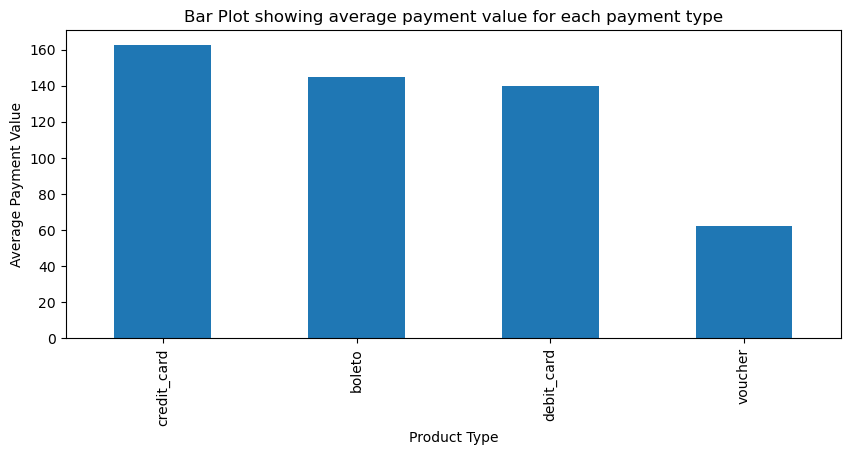

In [192]:
# Draw the bar plot for the above table

# Set the axis
fig, ax = plt.subplots(figsize = (10,4))

# Plot the bar
average_order_per_paymentmethod.plot.bar(ax = ax, legend = False)

plt.xlabel('Product Type')
plt.ylabel('Average Payment Value')
plt.title("Bar Plot showing average payment value for each payment type")
plt.show()


Credit card has the highest average payment value, followed by boleto and debit card. Voucher accounts for the least average payment value. 

## c) How does this value vary by product category 

To answer this question, we need the products_df, ProductCategoryName_df, and orderitems_df joined dataset

In [194]:
# Create a new column that sums price and frieght vale to get the payment value
product_productcategory_orderitems_df['payment_value'] = product_productcategory_orderitems_df['price'] + product_productcategory_orderitems_df['freight_value']

# Group the product_category_name_english by its categories and find the average payment value for each category
average_order_per_productcategory = product_productcategory_orderitems_df.groupby('product_category_name_english')['payment_value'].mean().sort_values(ascending = False).reset_index(name = 'mean_payment_value')

# Set product_category_name_english column  as my index
average_order_per_productcategory.set_index('product_category_name_english', inplace=True)

# Show the result
average_order_per_productcategory 


,mean_payment_value
product_category_name_english,
computers,1146.795222
small_appliances_home_oven_and_coffee,660.441711
home_appliances_2,520.663529
agro_industry_and_commerce,369.689009
musical_instruments,309.025544
...,...
food_drink,70.818237
cds_dvds_musicals,68.213571
diapers_and_hygiene,54.904359


##  <p><span style='color:purple'>Answering the business question</span></p>

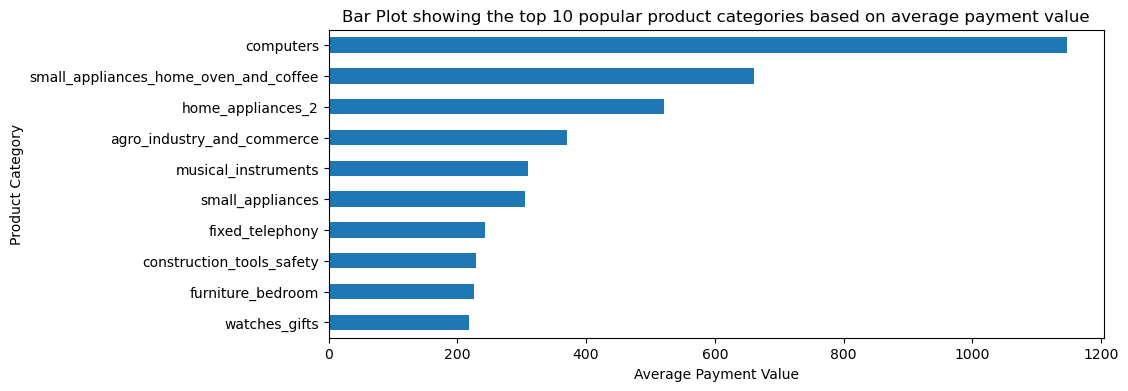

In [195]:
# Draw the bar plot for the above table

# Select top 10 categories
top10_average_order_per_productcategory = average_order_per_productcategory.head(10)

# Set the axis
fig,ax = plt.subplots(figsize = (10,4))

# plot the barplot using plt and have the values in the x axis
top10_average_order_per_productcategory.sort_values(by = 'mean_payment_value').plot(ax = ax, kind = 'barh', legend = False)

plt.xlabel('Average Payment Value')
plt.ylabel('Product Category')
plt.title("Bar Plot showing the top 10 popular product categories based on average payment value")

plt.show()


Computers, Small appliances home oven and coffee, home appliances2, agro industry and commerce, musical instruments, small appliances, fixed telephone, construction toold safety, furniture bedroom and watches gift are the highest product categories based on the average payment value.

However, Computers have the overall highest average payment value with a value of 1146.79 Brazilain Real

# 5.  Who are the top active sellers on Olist

Using the orderitems_df dataframe

In [62]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [196]:
# Group the sellers by seller id and find the count of order id for each seller id. 
active_sellers = orderitems_df.groupby('seller_id')['order_id'].count().sort_values(ascending = False).reset_index(name = 'order_count_per_seller_id')

#Set seller_id column as index
active_sellers .set_index('seller_id', inplace = True)

# Show the result
active_sellers.head(10)

,order_count_per_seller_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
955fee9216a65b617aa5c0531780ce60,1499
1025f0e2d44d7041d6cf58b6550e0bfa,1428
7c67e1448b00f6e969d365cea6b010ab,1364
ea8482cd71df3c1969d7b9473ff13abc,1203


The above table shows the top 10 most active sellers based on how many orders they have gotten. 

# 6.  What is the distribution of seller ratings on Olist, and how does this impact sales performance?

To answer this question, 2 dataframes were joined, namely orderitems_df and orderreviews_df

This join was achieved using Inner join on SQL, and will be imported into this notebook

![Picture](orderitemsandorderreviews.png)

> ### Import the joined dataset

In [64]:
# Import the joined dataset
orderreviews_and_orderitems_df = pd.read_csv('orderitemsandorderreviews.csv')

# Show the result
orderreviews_and_orderitems_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,column1,order_id.1,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00.000,2017-09-22 10:57:03.000,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,67b1ab8f3ec19d5a90f153f21757d3a1,0005a1a1728c9d785b8e2b08b904576c,1,NaN,Na descrição do produto quando fui efetuar a c...,2018-03-30 00:00:00.000,2018-04-02 00:52:01.000,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65
2,5c0b7e34ed85ec659bb064902d878e7a,0005f50442cb953dcd1d21e1fb923495,4,NaN,NaN,2018-07-05 00:00:00.000,2018-07-05 23:17:04.000,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56.000,53.99,11.40
3,5595c192e3c1566ab4e7a2748b8ed297,00063b381e2406b52ad429470734ebd5,5,NaN,"Fiquei um pouco triste, achei que a cor do cor...",2018-08-08 00:00:00.000,2018-08-09 00:12:30.000,11,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39.000,45.00,12.98
4,6322c405c0f34bf3ad870fd1a6b1fced,0006ec9db01a64e59a68b2c340bf65a7,5,Boa,Excelente serviço de compras on line.,2018-07-31 00:00:00.000,2018-08-01 23:05:10.000,12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20.000,74.00,23.32


> ### Drop some columns in the dataset

In [65]:
# Drop columns with null values and repeeated columns
orderreviews_and_orderitems_df.drop(['review_comment_title','review_comment_message', 'order_id.1','column1'], axis = 1, inplace = True)


## a) What is the distribution of seller ratings on Olist?

In [201]:
# Group the column needed for this analysis and show their value count

# Group the seller_id column by each individual seller and find the average review score for each seller,
# then round it to a whole number
sellerid_reveiwscore_mean_df = round(orderreviews_and_orderitems_df.groupby('seller_id')['review_score'].mean(),0).reset_index()

# Show the result
sellerid_reveiwscore_mean_df

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,4.0
1,001cca7ae9ae17fb1caed9dfb1094831,4.0
2,001e6ad469a905060d959994f1b41e4f,1.0
3,002100f778ceb8431b7a1020ff7ab48f,4.0
4,003554e2dce176b5555353e4f3555ac8,5.0
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.0
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.0
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.0
3093,fffd5413c0700ac820c7069d66d98c89,4.0


In [203]:
# Group the review score column by its ratings and find the number of sellers placed under each rating 
grouped_reviewscore_bysellers  = sellerid_reveiwscore_mean_df.groupby('review_score')['seller_id'].count().sort_values(ascending = False).reset_index(name = 'count')

# Set review_score as index
grouped_reviewscore_bysellers.set_index('review_score', inplace = True)

# Show the result
grouped_reviewscore_bysellers 


,count
review_score,
4.0,1634
5.0,855
3.0,316
1.0,160
2.0,130


##  <p><span style='color:purple'>Answering the business question</span></p>

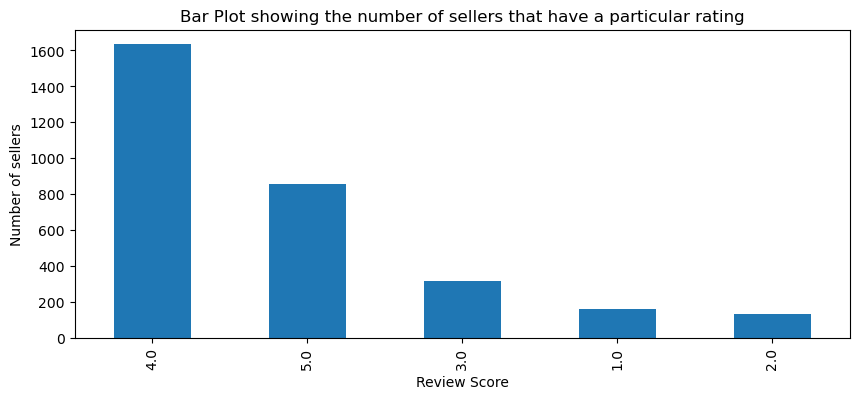

In [223]:
# Draw the bar plot for the above table

# Set the axis
fig, ax = plt.subplots(figsize = (10,4))

# Plot the bar
grouped_reviewscore_bysellers.plot.bar(ax = ax, legend = False)

plt.xlabel('Review Score')
plt.ylabel('Number of sellers')
plt.title("Bar Plot showing the number of sellers that have a particular rating")
plt.show()


From the chart above, more sellers recieved an average of 4.0 rating for the sale of their products. Only a few sellers recieved a low rating of (1.0 and 2.0)

## b)  How does each rating impact sales volume?

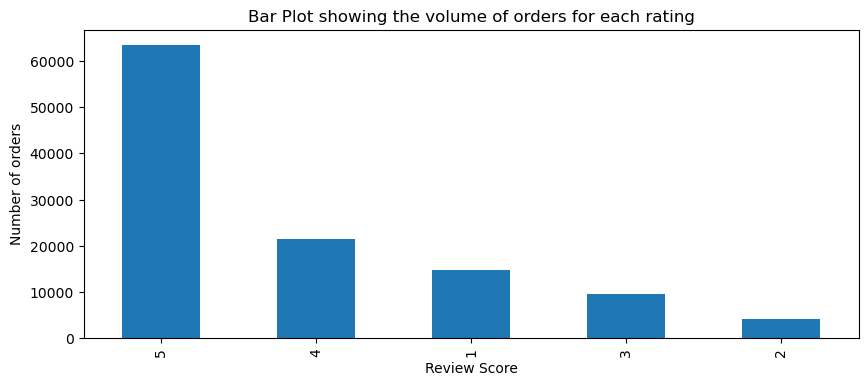

In [221]:
# Group the review score column by its ratings and find number of orders that recieve each rating
grouped_reviewscore_byorders = orderreviews_and_orderitems_df.groupby('review_score')['order_id'].count().sort_values(ascending = False)

# Set the axis
fig, ax = plt.subplots(figsize = (10,4))

# Plot the bar
grouped_reviewscore_byorders.plot.bar()

plt.xlabel('Review Score')
plt.ylabel('Number of orders')
plt.title("Bar Plot showing the volume of orders for each rating")
plt.show()


As expected, the product with the highest rating recieved the highest orders, and products with a low rating had lower number of orders.

# 7.  How many customers have made repeat purchases on Olist, and what percentage of total sales do they account for?

In [70]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## a) How many customers have made repeat purchases on Olist?

In order to get this answer, we will look through both customer_id and customer_unique_id columns of the customer_df dataframe to see if there are any repeating customers. 

In [71]:
print('This table contains {} rows'.format(customer_df.shape[0]))
print('There are {} unique customer_id'.format(len(customer_df['customer_id'].unique()))) 
print('There are {} unique customer_unique_id'.format(len(customer_df['customer_unique_id'].unique())))

This table contains 99441 rows
There are 99441 unique customer_id
There are 96096 unique customer_unique_id


There are 96,069 customer_unique_id's out of 99,441 number of rows. This means that there are repeating cutomers found in this column

##  <p><span style='color:purple'>Answering the business question</span></p>

In [72]:
number_of_uniquecustomers = customer_df['customer_unique_id'].value_counts()
number_of_uniquecustomers = number_of_uniquecustomers[number_of_uniquecustomers > 1]
num_of_repeating_customers = len(number_of_uniquecustomers)
print('There are {} repeating customers'.format(num_of_repeating_customers))

There are 2997 repeating customers


In [73]:
num_of_onetime_customers = len(customer_df['customer_unique_id'].unique()) - num_of_repeating_customers
print('There are {} one time customers'.format(num_of_onetime_customers))

There are 93099 one time customers


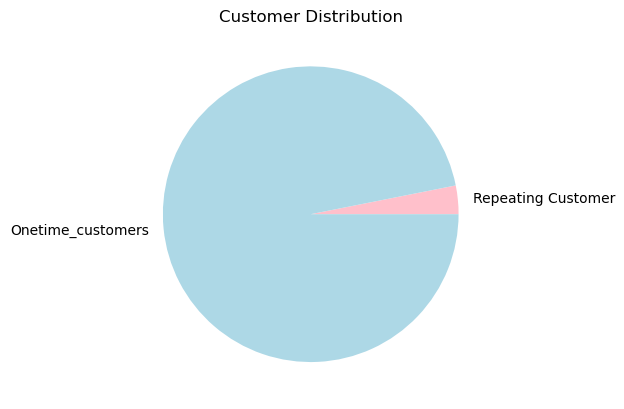

In [74]:
# set desired colors
colors = ['pink', 'lightblue']

# create a pie chart showing the number of repeating and one time customers
plt.pie([num_of_repeating_customers, num_of_onetime_customers] , labels = ['Repeating Customer', 'Onetime_customers'], colors = colors)

# set the title and axis labels
plt.title('Customer Distribution')

# show the plot
plt.show();


## b) What percentage of total sales do the repeating customers account for?

The customer,orders and orderitems will be joined using their customer_id and order_id columns in SQL

![Picture](customer_items_orders_joined.png)

> ### Import the joined dataset

In [75]:
# Import the joined dataset
cusomer_orders_orderitems_joined_df = pd.read_csv('customer_items_orders_joined.csv')
cusomer_orders_orderitems_joined_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,column1,order_id,customer_id.1,order_status,column1.1,order_id.1,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,71853,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.9,19.93
1,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,6298,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.0,17.87
2,32e2e6ab09e778d99bf2e0ecd4898718,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP,98566,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.9,11.85
3,fff5169e583fd07fac9fec88962f189d,6457be0b331148fb5454efc88d1e03d9,13458,santa barbara d'oeste,SP,97103,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03.000,144.0,8.77
4,3773bcf1a6fbd29233ea1c1b573c4f22,f5f088001070650f9e9a8cd773621f35,13208,jundiai,SP,99375,000c3e6612759851cc3cbb4b83257986,3773bcf1a6fbd29233ea1c1b573c4f22,delivered,18,000c3e6612759851cc3cbb4b83257986,1,b50c950aba0dcead2c48032a690ce817,218d46b86c1881d022bce9c68a7d4b15,2017-08-21 03:33:13.000,99.0,13.71


> ### Drop unnecessary rows and columns

In [76]:
# Drop unnecessary columns
cusomer_orders_orderitems_joined_df.drop(['column1', 'customer_id.1', 'column1.1', 'order_id.1'], axis = 1, inplace = True)

# Drop unnecessary rows
cusomer_orders_orderitems_joined_df.drop(cusomer_orders_orderitems_joined_df[cusomer_orders_orderitems_joined_df['order_status'] == 'canceled'].index, axis=0, inplace = True)
cusomer_orders_orderitems_joined_df.drop(cusomer_orders_orderitems_joined_df[cusomer_orders_orderitems_joined_df['order_status'] == 'unavailable'].index, axis=0, inplace = True)


##  <p><span style='color:purple'>Answering the business question</span></p>

In [77]:
# Group orders by customer_unique_id and count the number of orders for each customer
orders_per_customer = cusomer_orders_orderitems_joined_df.groupby('customer_unique_id')['order_id'].count()

# Filter customers with more than one order and sum up their sales
repeating_customers = orders_per_customer[orders_per_customer > 1]

# Find the sum of the price for all customers that have placed more than 1 order
total_price = cusomer_orders_orderitems_joined_df[cusomer_orders_orderitems_joined_df['customer_unique_id'].isin(repeating_customers.index)].groupby('customer_unique_id')['price'].sum().sum()

# Find the sum of the freight value for all customers that have placed more than 1 order
total_freight_value = cusomer_orders_orderitems_joined_df[cusomer_orders_orderitems_joined_df['customer_unique_id'].isin(repeating_customers.index)].groupby('customer_unique_id')['freight_value'].sum().sum()

#Find the sum of both price and freight value
total_sales = total_price + total_freight_value

# Total revenue was answered in the very first question
Total_Revenue

# Find the percentage of total sales made by repeating customer is
repeating_customers_percentage = round((total_sales/Total_Revenue)*100,2)

print('The percentage of total sales made by repeating customer is {}%'.format(repeating_customers_percentage))


The percentage of total sales made by repeating customer is 19.77%


# 8.  What is the average customer rating for products sold on Olist, and how does this impact sales performance?

In [78]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


The reviews are made based on the orders and not the individual products found in each order

In [79]:
average_order_review_ratings = round(orderreviews_df['review_score'].mean(),0)
print('The average customer rating for all orders on olist is {}'.format(average_order_review_ratings))

The average customer rating for all orders on olist is 4.0


# 9.  What is the total order cancellation on Olist, and how does this impact the company's revenue?

## a) What is the total order cancellation on Olist?

We will use the orders_df dataframe to filter and check how many orders were canceled and unavailable. 

In [80]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13


In [81]:
# Filter the dataframe to show only rows with canceled and unavailable order status and find the how many rows are present
total_canceled_orders = len(orders_df[(orders_df['order_status'] == 'canceled') | (orders_df['order_status'] == 'unavailable')])

print('The total number of canceled orders on olist is {}'.format(total_canceled_orders))


The total number of canceled orders on olist is 1234


## b)  How does this impact the company's revenue

We will use the orders_df and orderspayment merged dataframe to see how much the company lost due to canceled orders. 

In [82]:
orders_and_orderpayments_merged_df2 = pd.read_csv('ordersdf2andorderpayments.csv')
orders_and_orderpayments_merged_df2.head()

,column1,order_id,customer_id,order_status,order_purchase_date,order_id.1,payment_sequential,payment_type,payment_installments,payment_value
0,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,949d5b44dbf5de918fe9c16f97b45f8a,1.0,credit_card,1.0,72.20
1,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,ad21c59c0840e6cb83a9ceb5573f8159,1.0,credit_card,1.0,28.62
2,5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,a4591c265e18cb1dcee52889e2d8acc3,1.0,credit_card,6.0,175.26
3,6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,136cce7faa42fdb2cefd53fdc79a6098,1.0,credit_card,1.0,65.95
4,7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16,6514b8ad8028c9f2cc2374ded245783f,1.0,credit_card,3.0,75.16


In [83]:
# Filter the dataframe to show only rows with canceled and unavailable order status and find the sum of the payment values for these rows
canceled_order_amount = orders_and_orderpayments_merged_df2[(orders_and_orderpayments_merged_df2['order_status'] == 'canceled') | (orders_and_orderpayments_merged_df2['order_status'] == 'unavailable')]['payment_value'].sum()
canceled_order_amount = round(canceled_order_amount,0)

# Find the percentage loss due to canceled orders
all_revenue = orders_and_orderpayments_merged_df2['payment_value'].sum()
percentage_loss = round((canceled_order_amount/all_revenue)*100,2)


print('The canceled orders on olist lost the company R${}'.format(canceled_order_amount))
print("The company lost {}% of it's revenue due to canceled orders".format(percentage_loss))


The canceled orders on olist lost the company R$269735.0
The company lost 1.68% of it's revenue due to canceled orders


# 10.  Which payment methods are most commonly used by Olist customers

To answer this question, we will need to join 3 dataframes, customers_df, orders_df and orderpayments_df. This will be done using inner join in SQL and imported into this notebook.

![Picture](customer_orders_orderpayments.png)

In [153]:
# Import the joined dataset
customer_orders_orderpayments_df = pd.read_csv('customer_orders_orderpayments_joined.csv')

# Group the payment type by its categories and count the number in each category
payment_methods = customer_orders_orderpayments_df.groupby('payment_type')['payment_type'].count().sort_values(ascending = False)
payment_methods


payment_type
credit_card    76351
boleto         19689
voucher         5660
debit_card      1522
Name: payment_type, dtype: int64

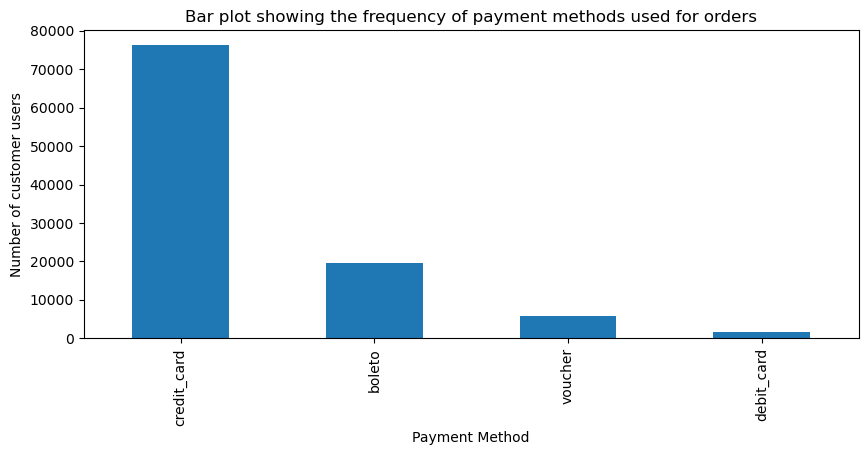

In [220]:
# Draw a bar plot for the table above

fig, ax = plt.subplots(figsize = (10,4))

payment_methods.plot.bar()

plt.xlabel('Payment Method')
plt.ylabel('Number of customer users')
plt.title('Bar plot showing the frequency of payment methods used for orders')

plt.show()

A large number of customers that shop on Olist use credit cards to make payments and a very few number of customers use debit cards. 

# 11.  Which product categories have the highest revenue on Olist, and how can the company increase revenue across different categories?

We will use product_productcategory_orderitems_df to answer this question.

In [233]:
# Create a new dataframe using only the required columns from product_productcategory_orderitems_df
productcategories_price_df = product_productcategory_orderitems_df.loc[:,['product_category_name_english','payment_value']]
productcategories_price_df.head()


,product_category_name_english,payment_value
0,cool_stuff,72.19
1,pet_shop,259.83
2,furniture_decor,216.87
3,perfumery,25.78
4,garden_tools,218.04


In [234]:
# Group the product_category_name_english column by its categories and find the sum of revenue for each category. 
# Use reset_index to convert it to a dataframe and name='total_revenue' to rename the new column
productcategories_grouped = productcategories_price_df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending = False).reset_index(name = 'total_revenue')

# Set product_category_name_english as the index
productcategories_grouped.set_index('product_category_name_english', inplace = True)

# Get the top 10 product categories that generate the highest revenue
productcategories_top10 = productcategories_grouped.head(10)

# Show the result
productcategories_top10 


,total_revenue
product_category_name_english,
health_beauty,1441248.07
watches_gifts,1305541.61
bed_bath_table,1241681.72
sports_leisure,1156656.48
computers_accessories,1059272.40
furniture_decor,902511.79
housewares,778397.77
cool_stuff,719329.95
auto,685384.32


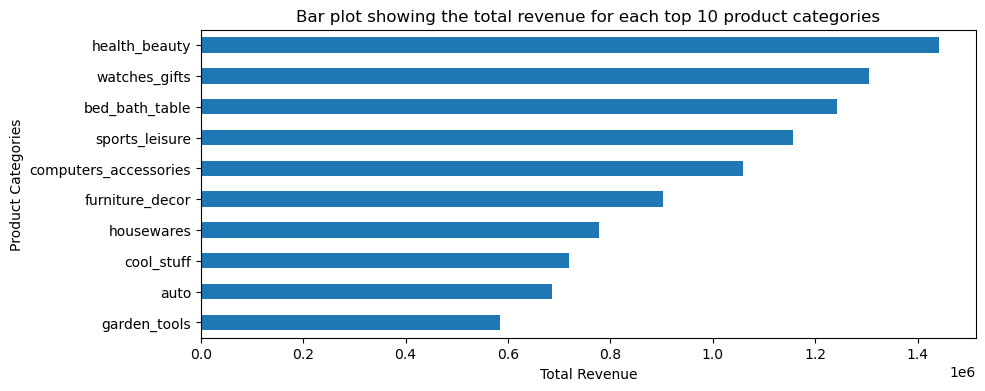

In [236]:
# Draw a bar plot for the table above

fig, ax = plt.subplots(figsize = (10,4))

productcategories_top10.sort_values(by = 'total_revenue').plot(ax = ax, kind = 'barh', legend = False)

plt.xlabel('Total Revenue')
plt.ylabel('Product Categories')
plt.title('Bar plot showing the total revenue for each top 10 product categories')

plt.show()

The product categories that generated the highest revenue are health_beauty, watches_gifts, bed_bath_table, sports_leisure, computers_accessories, furniture_decor, housewares, cool_stuff, auto, garden_tools.	

Some strategies the company can adopt to increase revenue acress other product categories include:

1. Analyzing and segmenting customers: The company can analyze their customer base to identify different customer segments with specific needs and preferences. By developing targeted marketing and sales strategies for each segment, the company can increase revenue by offering personalized products and services that meet their specific needs.

2. Offering promotions and discounts: Promotions and discounts can be used to attract new customers and increase sales volume. Companies can offer limited-time promotions, bundle deals, or loyalty programs to encourage customers to purchase more products.

3. Developing new products: Developing new products can help the company expand their product offerings and increase revenue. This could involve launching new products in existing categories or exploring new product categories altogether.

4. Improving pricing strategy: By analyzing market trends and customer behavior, the company can adjust their pricing strategy to increase revenue. This could involve raising prices for high-demand products or lowering prices for less popular products to stimulate demand.


# 12.  What Geolocation has high customer density.

We will use the customer_orders_orderpayments_df joined dataframe

In [247]:
# Create a new dataframe using only the required columns from customer_orders_orderpayments_df
geolocation_order_df = customer_orders_orderpayments_df.loc[:,['customer_state','order_id', 'payment_value']]
geolocation_order_df.head()


,customer_state,order_id,payment_value
0,SP,298fcdf1f73eb413e4d26d01b25bc1cd,96.12
1,MG,771ee386b001f06208a7419e4fc1bbd7,81.16
2,SP,0573b5e23cbd798006520e1d5b4c6714,51.95
3,MG,616105c9352a9668c38303ad44e056cd,75.78
4,MG,cf95215a722f3ebf29e6bbab87a29e61,102.66


In [249]:
# Group the customer state by its categories and find the count of each category
geolocation_order_grouped_df = geolocation_order_df.groupby('customer_state')['order_id'].count().sort_values(ascending = False).reset_index(name = 'count')

# Set customer state as the index
geolocation_order_grouped_df.set_index('customer_state',inplace = True)

# Show the result
geolocation_order_grouped_df


,count
customer_state,
SP,43268
RJ,13437
MG,12036
RS,5642
PR,5238
SC,3735
BA,3593
DF,2197
ES,2098


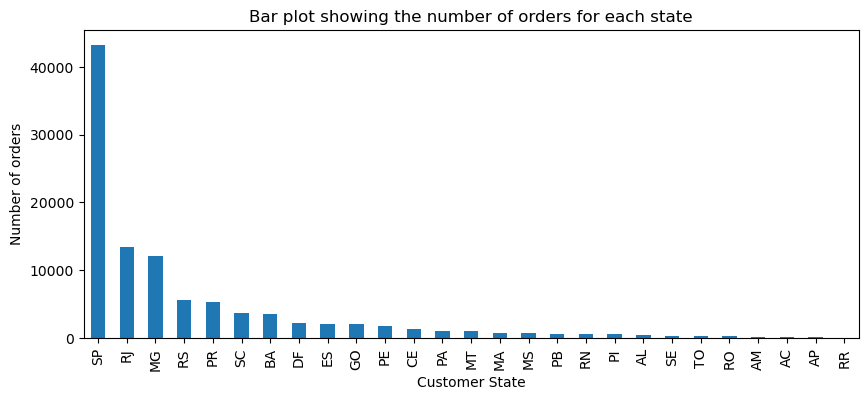

In [253]:
# Draw the bar plot using the above table

fig, ax = plt.subplots(figsize = (10,4))

geolocation_order_grouped_df.plot.bar(ax = ax, legend = False)

plt.xlabel('Customer State')
plt.ylabel('Number of orders')
plt.title('Bar plot showing the number of orders for each state')

plt.show()

SP state accounts for the state with the highest orders, recording a total of 43,268 orders, while RR state has the least total orders of 45.

___

# Summary Analysis Insight

**The time period for this analysis was from September 2016 to September 2018. During this period;**

- The total revenue generated by Olist was 15.74 Million Brazillian Real


- The total number of orders placed on Olist was 98207


- Bed Bath Table, Health Beauty, Sport Leisure, Furniture Decor, Computer Accessories, Housewares, Watches Gifts, Telephone, Garden Tools and Auto were the most popular product categories based on their sale volume.


- The average order value was 153.44 Brazillian Real


- Credit card had the highest average payment value, followed by boleto and debit card. Voucher accounted for the least average payment value.


- Computers, Small appliances home oven and coffee, Home Appliances2, Agro industry and commerce, Musical Instruments, Small Appliances, Fixed Telephone, Construction toold safety, Furniture bedroom and watches gift were the highest product categories based on the average payment value. However, Computers had the overall highest average payment value with a value of 1146.79 Brazilain Real.


- The top 10 active sellers on Olist had 2033, 1987, 1931, 1775, 1551, 1499, 1428, 1364, 1203, and 1171 product orders respectively. 


-  Most sellers received an average of 4.0 rating for their services. Only a few sellers received a low rating of (1.0 and 2.0) 


- Products with high ratings (5 ★ and 4 ★) received large orders, while products with a low ratings had a lower number of orders.


- There were 2997 repeating customers out of 96,069 total customers, and they accounted for 19.77% of the total sales.


- The average customer rating for all orders on olist were 4.0


- The total number of canceled orders on olist was 1234 and the company lost 269,735 Brazillian Real, which accounted for 1.68% of its total revenue.


- A large number of customers that shoped on Olist used credit cards to make payments and very few number of customers used debit cards.


- The product categories that generated the highest revenue for the company were Health Beauty, Watches Gifts, Bed Bath Tables, Sports Leisure, Computers Accessories, Furniture Decor, Housewares, Cool Stuff, Auto, and Garden Tools.


- SP state accounted for the state with the highest number of orders, recording a total of 43,268 orders, while RR state had the least total orders of 45.

# Proposed Solutions aimed at improving the company's Performance

**Based on the insights above,here are some actions that Olist could take to boost its revenue and profit.**


1. Increase advertising efforts: Based on the data, it appears that certain product categories such as Health Beauty, Watches Gifts, and Bed Bath Table generate higher revenue for Olist. Focusing on promoting these categories through targeted marketing campaigns could increase sales and revenue.


2. Offer incentives to repeat customers: Repeat customers account for a significant portion (approximately 20%) of Olist's sales. Offering incentives such as discounts, loyalty programs, or exclusive access to new products could encourage customers to continue shopping with Olist and increase revenue.


3. Improve seller ratings: Customers tend to purchase products from sellers with higher ratings. Encouraging sellers with lower ratings to improve their ratings through customer service training, better product descriptions, and timely delivery could lead to increased sales and revenue.


4. Expand payment options: While credit cards are the most popular payment method, expanding payment options to include more payment methods, such as e-wallets, could attract more customers and increase sales.


5. Improve product selection: Based on the data, certain product categories generate higher revenue for Olist. Adding more selection of products within these categories and offering exclusive or hard-to-find items could attract more customers and increase revenue. For example; if Olist currently offers a limited selection of health and beauty products, expanding the selection to include exclusive or niche brands could help the company to stand out in the market and attract new customers who are looking for those specific products.


6. Focus on reducing canceled orders: Canceled orders result in lost revenue and can damage customer trust. Implementing measures such as improved inventory management and better communication with customers could help reduce canceled orders and increase revenue.


***Thank you for reading my notebook***

[My linkedin](https://www.linkedin.com/in/judith-okon-pmp%C2%AE-146451138/) 
[My Twitter](https://twitter.com/likedbyJ)
[My Github](https://github.com/Judithokon)